Data in this notebook needs a lot of cleaning. 
In this project, I'll analyze data on the Star Wars movies.

While waiting for Star Wars: The Force Awakens, the team at FiveThirtyEight was interested in answering some questions about Star Wars fans. One question that particularly interested the team was: Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

In this project, I'll be cleaning and exploring the dataset in Jupyter. You can find the dataset here if you want to download it. https://github.com/fivethirtyeight/data/tree/master/star-wars-survey

We need to specify an encoding because the dataset has some characters that aren't in the Python default utf-8 encoding.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("F:/MEGA/ML/Dataquest/StarWars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Then we need to remove any rows where RespondentID is NaN

In [78]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

Take a look at the next two columns, which are:
* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both columns are currently string types -- Yes or No. In order to make it a bit easier to analyze down the line, we need to convert each column to a Boolean, with only True, False, or NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparisons.

In [79]:
yes_no = {
    "Yes": True,
    "No": False,
    np.nan: False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

Step 4. Cleaning Up Checkbox Columns

The next 6 columns represent a checkbox question. The respondent was asked Which of the following Star Wars films have you seen? Please select all that apply., and then was able to check off a series of boxes indicating which movies they saw.

The columns that represent this data are:

Which of the following Star Wars films have you seen? Please select all that apply. -- whether or not the respondent saw Star Wars: Episode I The Phantom Menace.

Unnamed: 4 -- whether or not the respondent saw Star Wars: Episode II Attack of the Clones.

Unnamed: 5 -- whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.

Unnamed: 6 -- whether or not the respondent saw Star Wars: Episode IV A New Hope.

Unnamed: 7 -- whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.

Unnamed: 8 -- whether or not the respondent saw Star Wars: Episode VI Return of the Jedi

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw it. If the value is NaN, the respondent either didn't answer, or didn't see the movie, but we'll assume that they didn't see the movie.

We need to convert each of these columns to a Boolean, then rename the column to have a more clear name. 

In [80]:
film_dict = {
    'Star Wars: Episode I  The Phantom Menace': True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

for i in range(3, 9):
        star_wars.iloc[:, i] = star_wars.iloc[:, i].map(film_dict)



5: Cleaning Up Ranking Columns

The next 6 columns ask the respondent to rank the Star Wars movies in order of least to most favorite. 1 means the film was their most favorite, and 6 means it was their least favorite. Each of the following columns can contain the values 1, 2, 3, 4, 5, 6, or NaN:

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. -- How much the respondent liked Star Wars: Episode I The Phantom Menace.

Unnamed: 10 -- How much the respondent liked Star Wars: Episode II Attack of the Clones.

Unnamed: 11 -- How much the respondent liked Star Wars: Episode III Revenge of the Sith.

Unnamed: 12 -- How much the respondent liked Star Wars: Episode IV A New Hope.

Unnamed: 13 -- How much the respondent liked Star Wars: Episode V The Empire Strikes Back.

Unnamed: 14 -- How much the respondent liked Star Wars: Episode VI Return of the Jedi.

We need to do the same thing like in the previous step.

In [81]:
column_names_dict = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6",
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
}
        
star_wars = star_wars.rename(columns=column_names_dict)

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


6: Finding The Highest Ranked Movie

Now that we've cleaned up the ranking columns, you can easily find the highest ranked movie.

In [82]:

high_rank = 6
high_ranked_film = 0
for i in range(9, 15):
        a = star_wars.iloc[:, i].mean()
        if a < high_rank:
            high_rank = a
            high_ranked_film = i

print(star_wars.columns[high_ranked_film])
print(high_rank)
# star_wars.head(10)

ranking_5
2.513157894736842


It means that  the highest ranked movie is the 5th movie which is "Star Wars: Episode V The Empire Strikes Back".

Build the bar chart to show that.

<Container object of 6 artists>

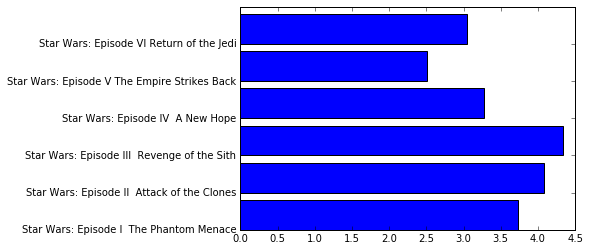

In [83]:
N = 6
ind = np.arange(N)
list_of_ratings = star_wars.iloc[:, 9:15].mean()

labels = ('Star Wars: Episode I  The Phantom Menace', "Star Wars: Episode II  Attack of the Clones", "Star Wars: Episode III  Revenge of the Sith", "Star Wars: Episode IV  A New Hope", "Star Wars: Episode V The Empire Strikes Back", "Star Wars: Episode VI Return of the Jedi")

plt.barh(ind, list_of_ratings, tick_label=labels )

7: Finding The Most Seen Movie

In [84]:
seen1 = star_wars["seen_1"].sum()
seen2 = star_wars["seen_2"].sum()
seen3 = star_wars["seen_3"].sum()
seen4 = star_wars["seen_4"].sum()
seen5 = star_wars["seen_5"].sum()
seen6 = star_wars["seen_6"].sum()
list_of_views = (seen1, seen2, seen3, seen4, seen5, seen6)
print(seen1, seen2, seen3, seen4, seen5, seen6)

673 571 550 607 758 738


Build the bar chart for views as well.

<Container object of 6 artists>

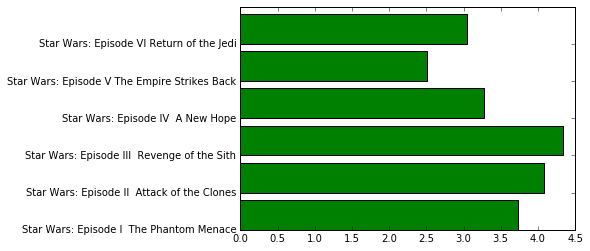

In [85]:
plt.barh(ind, list_of_ratings, tick_label=labels, color="green")

WE can see that the most seen movie is also "Star Wars: Episode V The Empire Strikes Back"

8: Exploring The Data By Binary Segments

We've seen what the whole survey population thinks are the highest ranked movies, but we can break this down by segments. There are several columns that segment our data into two groups, including:

Do you consider yourself to be a fan of the Star Wars film franchise? -- True or False.
Do you consider yourself to be a fan of the Star Trek franchise? -- Yes or No.
Gender -- Male or Female.

We can compute statistics like the most seen movie and the highest ranked movie separately for each group. Let's define each group.

In [86]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

star_wars_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]]
star_wars_not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

star_trek_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
star_trek_not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

Then find most ranked film for each group

In [87]:
high_rank_males = 6.0
high_ranked_film_males = 0
for i in range(9, 15):
        a = males.iloc[:, i].mean()
        if a < high_rank_males:
            high_rank_males = a
            high_ranked_film_males = i
print(high_rank_males)
print(males.columns[high_ranked_film_males])

2.458628841607565
ranking_5


In [97]:
high_rank_females = 6.0
high_ranked_film_females = 0
for i in range(9, 15):
        a = females.iloc[:, i].mean()
        if a < high_rank_females:
            high_rank_females = a
            high_ranked_film_females = i
print(high_rank_females)
print(males.columns[high_ranked_film_females])

2.5692695214105794
ranking_5


In [100]:
high_rank_star_wars_fans = 6.0
high_ranked_film_star_wars_fans = 0
for i in range(9, 15):
        a = star_wars_fans.iloc[:, i].mean()
        if a < high_rank_star_wars_fans:
            high_rank_star_wars_fans = a
            high_ranked_film_star_wars_fans = i
print(high_rank_star_wars_fans)
print(star_wars_fans.columns[high_ranked_film_star_wars_fans])

2.3333333333333335
ranking_5


In [101]:
high_rank_star_wars_not_fans = 6.0
high_ranked_film_star_wars_not_fans = 0
for i in range(9, 15):
        a = star_wars_not_fans.iloc[:, i].mean()
        if a < high_rank_star_wars_not_fans:
            high_rank_star_wars_not_fans = a
            high_ranked_film_star_wars_not_fans = i
print(high_rank_star_wars_not_fans)
print(star_wars_not_fans.columns[high_ranked_film_star_wars_not_fans])

2.862676056338028
ranking_5


In [102]:
high_rank_star_trek_fans = 6.0
high_ranked_film_star_trek_fans = 0
for i in range(9, 15):
        a = star_trek_fans.iloc[:, i].mean()
        if a < high_rank_star_trek_fans:
            high_rank_star_trek_fans = a
            high_ranked_film_star_trek_fans = i
print(high_rank_star_trek_fans)
print(star_trek_fans.columns[high_ranked_film_star_trek_fans])

2.4072289156626505
ranking_5


In [103]:
high_rank_star_trek_not_fans = 6.0
high_ranked_film_star_trek_not_fans = 0
for i in range(9, 15):
        a = star_trek_not_fans.iloc[:, i].mean()
        if a < high_rank_star_trek_not_fans:
            high_rank_star_trek_not_fans = a
            high_ranked_film_star_trek_not_fans = i
print(high_rank_star_trek_not_fans)
print(star_trek_fans.columns[high_ranked_film_star_trek_not_fans])

2.6343825665859564
ranking_5


Lets plot the bar chart to better understand the difference between groups

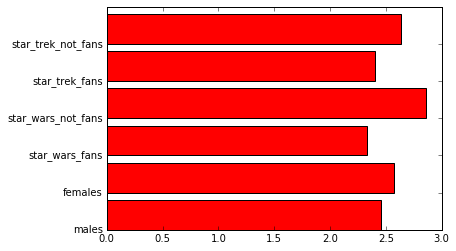

In [104]:
list_of_groups = ('males', 'females', 'star_wars_fans', 'star_wars_not_fans', 'star_trek_fans', 'star_trek_not_fans')
list_of_ranks = (high_rank_males, high_rank_females, high_rank_star_wars_fans, high_rank_star_wars_not_fans, high_rank_star_trek_fans, high_rank_star_trek_not_fans)
fig, ax = plt.subplots()
rects1 = ax.barh(ind, list_of_ranks, color='r', tick_label=list_of_groups)

Now we can see easily that most difference in opinions which film is the best  is between Star Wars fans and not fans.

Here is how the data looks adter the cleaning

In [106]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,False,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
